In [2]:
# Import libraries
import pandas as pd
import requests, io, json
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from datetime import datetime
from typing import Dict, List

In [3]:
# Step 1 - Call the API for available language models
import requests
request = requests.get(f"http://cmdb.vectorspacebio.science/api/get_language_models?vxv_wallet_addr=0076e0b8328203a1beb056caf17a05a78929bd74")
language_models = request.json()
print(language_models)

[{'name': 'biosciences_0001', 'description': 'placeholder', 'data sources': 'Proteins DB, Pubmed Abstracts, MW Dictionary, Geneontology stopwords list', 'row_types': 'protein_names'}]


In [4]:
# Step 2 - Choose a language model - e.g., Biosciences_0001
language_model = language_models[0]
print(language_model)

{'name': 'biosciences_0001', 'description': 'placeholder', 'data sources': 'Proteins DB, Pubmed Abstracts, MW Dictionary, Geneontology stopwords list', 'row_types': 'protein_names'}


In [5]:
# Step 3 - Define up to 10 custom features / column labels (up to 100,000 labels upon request)
column_labels = ["mena", "opa1", "cardiolipin", "plant"]

In [6]:
# Step 4 - Optional: Submit a context-dependency - e.g., "mitochondria"
context_dependency = ""
# context_dependency = "mitochondria"

In [7]:
# Step 5 - Call the API with the selected parameters and return two matrices
# This method may take several minutes to complete depending on the request.
import requests
import pandas as pd

# Specify the types of rows
row_types = "protein_names"

# Add the context dependency component of the query
context_dependency_param = ""
if context_dependency != "":
    context_dependency_param = f"&context_dependency={context_dependency}"

# Retrieve the correlation matrix dataset and hidden relationship matrix
cmd_request = requests.get(f"http://cmdb.vectorspacebio.science/api/get_correlation_matrix?vxv_wallet_addr=0076e0b8328203a1beb056caf17a05a78929bd74&language_model={language_model['name']}&row_types={row_types}&column_labels={'%2C%20'.join(column_labels)}{context_dependency_param}")

# Retrieve request and convert to dataframes
cm_dataset = pd.DataFrame.from_dict(cmd_request.json())

# Preview the correlation matrix dataset
cm_dataset.head()

,mena,opa1,cardiolipin,plant
gpx3,0.176299,0.156379,0.117012,0.087985
klf4,0.212899,0.146064,0.132100,0.098185
lipf,0.149390,0.142724,0.135704,0.106586
serpinh1,0.160110,0.149142,0.126802,0.077069
thy1,0.183890,0.129527,0.124178,0.076974


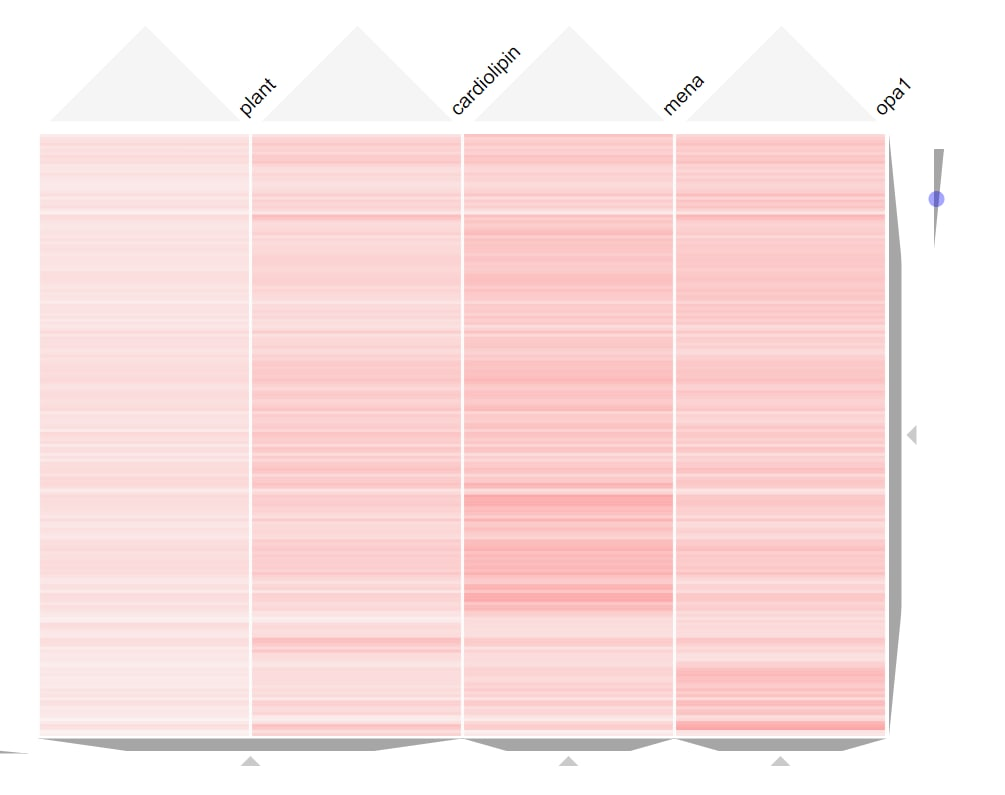

In [8]:
# Example of heatmap with rows (proteins) and column labels

from IPython.display import Image
Image(filename='heatmap.jpg') 

In [9]:
# Step 6 - Create a graph from the correlation matrix dataset
# To expand the network of relationships, submit each leaf node to the PPIN (Protein-Protein Interaction Network) API
# The number of leaf nodes can be increased by adjusting the value from 5
import requests

max_depth = 1
top_n = 5

network_results = []

for column_label in list(cm_dataset.keys()):
    ppin_request = requests.get(f"http://ppin.vectorspacebio.science/api/protein_network?vxv_wallet_addr=d1030ededff0f348992fd4d41ae169dae99bf9c0&query={column_label}&branches={top_n}&max_depth={max_depth}")
    result = json.loads(ppin_request.content.decode())
    network_results.append(result)

In [10]:
# Step 7 - Prepare the data for high charts or similar software
nodes = []

# Add the root node of the graph
root_protein = "klf4"
for col in column_labels:
    nodes.append([[root_protein, col]])

# Add the leaf nodes
for result in network_results:
    for item in result["graph_network"]:
        nodes.append([[item["source"], item["target"]], item["hidden_relationship"]])

# Output nodes to go into graph software
print(nodes)

[[['klf4', 'mena']], [['klf4', 'opa1']], [['klf4', 'cardiolipin']], [['klf4', 'plant']], [['mena', 'Q8N8S7'], 1], [['mena', 'Q7Z6K5'], 1], [['mena', 'P35080'], 1], [['mena', 'Q9UHD8'], 1], [['mena', 'P11171'], 1], [['opa1', 'O95140'], 0], [['opa1', 'Q96RR1'], 1], [['opa1', 'Q9Y3D6'], 0], [['opa1', 'O43181'], 1], [['opa1', 'Q9UQ90'], 0], [['cardiolipin', 'Q9UJA2'], 1], [['cardiolipin', 'Q16635'], 1], [['cardiolipin', 'Q9NRY6'], 1], [['cardiolipin', 'Q643R3'], 1], [['cardiolipin', 'Q6UXV4'], 1], [['plant', 'Q9BU02'], 1], [['plant', 'Q15050'], 1], [['plant', 'Q96MB7'], 1], [['plant', 'Q6ICC9'], 1], [['plant', 'Q8IYN0'], 1]]
